<a href="https://colab.research.google.com/github/sankadesh/tensorflow-image-classifier-prototype/blob/main/notebooks/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opendatasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/datasets/jakupymeraj/cats-and-dogs-image-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sankadassanayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jakupymeraj/cats-and-dogs-image-dataset


100%|██████████| 217M/217M [00:00<00:00, 692MB/s] 

In [5]:
Batch_size = 32
Image_size = (128,128)

In [6]:
train_data_dir = '/content/cats-and-dogs-image-dataset/dataset/training_set'
test_data_dir = '/content/cats-and-dogs-image-dataset/dataset/test_set'

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=Batch_size,
    image_size=Image_size,
    subset='training',
    validation_split=0.1,
    seed=42

)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=Batch_size,
    image_size=Image_size,
    subset='validation',
    validation_split=0.1,
    seed=42

)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=Batch_size,
    image_size=Image_size
)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


Verify data divided correctly or not

In [10]:
train_data.class_names

['cats', 'dogs']

In [11]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


plot some images

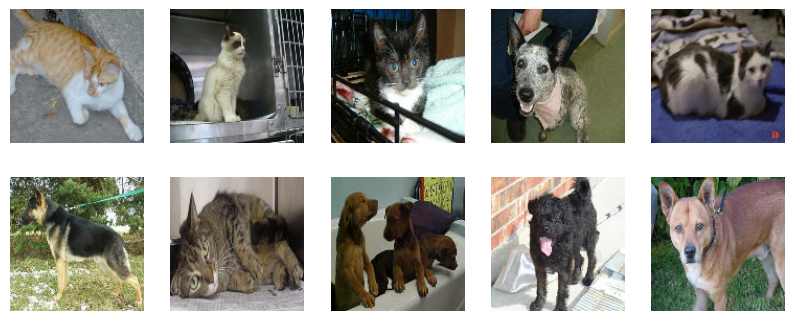

In [13]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    #plt.title(class_names[label[i]])
    plt.axis('off')

**Feature scaling**

In [14]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 38.55078     21.550781    31.550781  ]
   [ 39.90625     22.90625     32.90625   ]
   [ 36.6875      19.6875      29.6875    ]
   ...
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[ 38.44922     21.449219    31.449219  ]
   [ 37.328125    20.328125    30.328125  ]
   [ 35.32422     18.324219    28.324219  ]
   ...
   [  0.           0.           0.        ]
   [  0.           0.32421875   0.        ]
   [  0.           0.           0.        ]]

  [[ 39.987534    22.987534    32.987534  ]
   [ 38.27568     21.27568     31.27568   ]
   [ 38.039062    21.039062    31.039062  ]
   ...
   [  1.           0.           0.        ]
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]]

  ...

  [[184.55377    171.84134    185.32405   ]
   [191.96484    179.41348    193.68916   ]
   [197.16423    183.4764     196.32031   ]
   ...
   [ 12.           1.   

here we can see that our image data in rgb values (0,255) range , we change this data range to (0,1) -normalize

In [17]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [18]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.33361313 0.3732118  0.46510825]
   [0.28804237 0.20327064 0.37857547]
   [0.3038884  0.16342941 0.37726966]
   ...
   [0.5541973  0.39748776 0.3320772 ]
   [0.54515934 0.3999081  0.337163  ]
   [0.53333336 0.40392157 0.3372549 ]]

  [[0.35903955 0.42570156 0.45473346]
   [0.33983907 0.2941083  0.4078691 ]
   [0.2924788  0.16569453 0.35958216]
   ...
   [0.5516391  0.4040288  0.33469668]
   [0.55417734 0.41420168 0.34738782]
   [0.5462929  0.4168811  0.34748775]]

  [[0.37059075 0.44638732 0.4476997 ]
   [0.36649793 0.38684884 0.43119627]
   [0.31189275 0.24541698 0.38218993]
   ...
   [0.551011   0.40784314 0.33628982]
   [0.5431222  0.41754007 0.3352484 ]
   [0.54509807 0.41960785 0.33532476]]

  ...

  [[0.8127298  0.7617494  0.73822   ]
   [0.8147212  0.7676624  0.72054225]
   [0.8104905  0.76343167 0.7085297 ]
   ...
   [0.8097607  0.7823097  0.75093716]
   [0.8090001  0.78933096 0.76578647]
   [0.79248106 0.7728732  0.75520056]]

  [[0.80693775 0.75595737 0.732427

Data augmentation - here we generate more image layer to add more data when model is training

In [22]:
data_augmentation = tf.keras.Sequential(
    [
     tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),

    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Model Building**

In [23]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))